In [1]:
import os

os.chdir("../")

In [2]:
from matplotlib import pyplot as plt
from base import Transpose, r2, word_frequency
from tqdm import tqdm


def word_len_frequency(txt):
    txt = txt.replace("\n", " ")
    while "  " in txt:
        txt = txt.replace("  ", " ")
    lens = list(map(len, txt.split(" ")))
    len_freq = [lens.count(i) / len(txt) for i in range(max(lens))]
    return len_freq


def word_len_frequency_dict(txt):
    txt = txt.replace("\n", " ")
    while "  " in txt:
        txt = txt.replace("  ", " ")
    splited = txt.split(" ")
    le = len(splited)
    di = {w: splited.count(w) / le for w in set(splited)}
    return di

# Theory

In [ ]:
txt = ""
for fp in [f"./deciphered_vignere/message{i}.txt" for i in range(2, 7)]:
    with open(fp, "r") as f:
        txt += f.read()
th = word_len_frequency_dict(txt)

In [ ]:
{k: v for k, v in th.items() if v > 0.005}

In [ ]:
plt.plot(th)
plt.show()

# Test with ciphered text

In [6]:
with open("./deciphered_vignere/message1.txt", "r") as f:
    ctxt = f.read()


def test_transpose(dec, text):
    txt_tr = Transpose(dec)(text)
    tmp = word_len_frequency_dict(txt_tr)
    ks = tmp.keys()
    return [tmp[k] if k in ks else 0 for k in word_frequency.keys()]


first = list(word_frequency.values())
r2s = [r2(first, test_transpose(i, ctxt)) for i in tqdm(range(1, len(ctxt)))]


 84%|████████▍ | 3650/4341 [00:15<00:02, 245.52it/s]


100%|██████████| 4341/4341 [00:18<00:00, 240.16it/s]


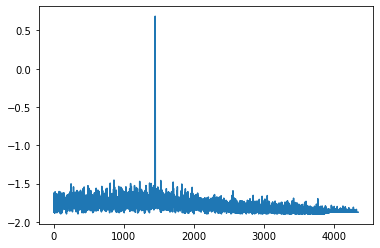

1447


In [10]:
plt.plot(r2s)
# plt.ylim((0,1))
plt.show()
m = max(range(1, len(ctxt)), key=lambda i: r2s[i - 1])
print(m if r2s[m - 1] > 0 else 0)

# TODO
 * detect most frequent french words